<mark><font size=3>**중앙대학교 인문콘텐츠연구소 비전공자를 위한 2022 여름 프로그래밍 강좌 (4/5)**</font></mark><br/>
<font color=MediumSeaGreen size=5>**Colab을 활용한 파이썬 텍스트 분석 입문**</font>  <font color=black size=5></font> 🐍

---

---
## **오늘 배울 내용: 텍스트 분석 1**

##### 1. 정규표현식(regular expression) 
##### 2. 텍스트 파일 쓰고 읽기 (file read/write)
##### 3. 웹 스크레이핑 (web scraping)
##### 4. API 활용
##### 5. 워드 클라우드 분석 (word cloud)


<font color='red'>**실습을 진행하기 앞서 sample_text 폴더 안에 있는**</font> 

<font color='red'>**텍스트 파일과 한글 나눔 고딕 볼드 폰트 파일을 모두**</font>  

<font color='red'>**Colab 의 sample_data 폴더에 업로드 하세요.**</font>

---
### **1. 정규표현식** (https://wikidocs.net/4308)

주어진 텍스트에서 원하는 문자열 패턴(pattern)을 추출하고 싶을 때 

**정규표현식(regular expression)**을 사용합니다.

https://regex101.com/

예를 들어 문장이나 텍스트에서 숫자만을 추출하고 싶을 때, 다음과 같은 정규표현식으로 숫자라는 패턴을 지정할 수 있습니다.

```
\d
[0-9]
```

파이썬에서는 이러한 정규표현식을 다루는 패키지가 있는데 **re**라는 **파이썬 패키지**입니다.

https://www.w3schools.com/python/python_regex.asp

**파이썬 패키지**는 다양하고 복잡한 데이터 처리를 한데 모아 간단하게 사용할 수 있게 만든 프로그램의 뭉치입니다.

**import** 라는 파이썬 키워드를 사용하여 패키지명을 지정하는 것으로 

해당 패키지를 파이썬 실행 환경에 탑재(import)하여 사용할 수 있습니다.

```
import package
```

In [1]:
# 인덱스를 사람이 일일히 지정하여 문장 속 숫자를 추출한 프로그램

sentence = "파티에 총 32명을 불렀는데, 그 중 3명이 불참하였다."

invited = int(sentence[6:8])
no_show = int(sentence[-10])
attended = invited - no_show

print("파티에 참석한 사람은 총 {}명이다.".format(attended))

파티에 참석한 사람은 총 29명이다.


---
위의 프로그램을 **re** 모듈을 사용하여 풀어 보겠습니다.

In [2]:
import re

sentence = "파티에 총 32명을 불렀는데, 그 중 3명이 불참하였다."

numbers = re.findall(r'\d+', sentence)
numbers

['32', '3']

In [3]:
invited = int(numbers[0]) 
no_show = int(numbers[1])
attended = invited - no_show

print("파티에 참석한 사람은 총 {}명이다.".format(attended))

파티에 참석한 사람은 총 29명이다.


---
❓ 아래의 문장에서 re 모듈의 **findall( )** 함수를 이용하여 숫자만을 추출한 후, 

추출한 (문자열로 된) 숫자 리스트를 for 문으로 돌려서 

결혼식 하객이 총 몇 명인지를 구하세요.

```
wedding = '''결혼식에는 신부 측 친척 14명, 직장 동료 5명, 대학 동창 7명, 
             교회 성가대원 3명이 참석하고, 
             신랑 측 친척 12명, 직장 동료 9명, 대학 동창 15명, 
             동호회 회원이 4명 참석할 예정이다.'''
```

In [4]:
import re

wedding = '''결혼식에는 신부 측 친척 14명, 직장 동료 5명, 대학 동창 7명, 
             교회 성가대원 3명이 참석하고, 
             신랑 측 친척 12명, 직장 동료 9명, 대학 동창 15명, 
             동호회 회원이 4명 참석할 예정이다.'''

number_str = re.findall(r'\d+', wedding)

sum = 0

for n in number_str:
  sum += int(n)   # sum = sum + int(n)

print("결혼식 참석 인원은 {}명이다.".format(sum))

결혼식 참석 인원은 69명이다.


---
❓ 아래와 같은 HTML 소스가 있습니다. 

```
html = '''<!DOCTYPE html>
<html>
<body>

<h1>My First Heading</h1>

<p>My first paragraph.</p>

</body>
</html>'''
```

findall 을 이용하여 아래와 같이 HTML 태그를 추출하고 출력해 주세요.

```
['<!DOCTYPE html>', '<html>', '<body>', '<h1>', '</h1>', '<p>', '</p>', '</body>', '</html>']
```

[힌트] ```<[^>]*>```

In [5]:
import re

html = '''<!DOCTYPE html>
<html>
<body>

<h1>My First Heading</h1>

<p>My first paragraph.</p>

</body>
</html>'''

print(re.findall(r'<[^>]*>', html))

['<!DOCTYPE html>', '<html>', '<body>', '<h1>', '</h1>', '<p>', '</p>', '</body>', '</html>']


---
### **2. 텍스트 파일 쓰고 읽기** (https://wikidocs.net/26)

**2-1. 파일 쓰기 (write)**

프로그램에서 사용한 데이터를 **파일로 내보내는 방법**에 대해 배워 보겠습니다.

In [6]:
f = open("새파일.txt", 'w')
f.close()

In [7]:
f = open("/content/sample_data/새파일.txt", 'w')
f.close()

In [8]:
f = open("/content/sample_data/새파일.txt", 'w')
f.write("안녕하세요.")
f.close()

In [9]:
sentence = "파티에 총 32명을 불렀는데, 그 중 3명이 불참하였다."

f = open("/content/sample_data/새파일.txt", 'w')
f.write(sentence)
f.close()

In [10]:
sentence = "파티에 총 32명을 불렀는데, 그 중 3명이 불참하였다."
wedding = '''\n결혼식에는 신부 측 친척 14명, 직장 동료 5명, 대학 동창 7명, 
             교회 성가대원 3명이 참석하고, 
             신랑 측 친척 12명, 직장 동료 9명, 대학 동창 15명, 
             동호회 회원이 4명 참석할 예정이다.'''

f = open("/content/sample_data/새파일.txt", 'w')
f.write(sentence)
f.write(wedding)
f.close()

---
❓ my_file.txt 라는 파일을 만들어 아래의 문장을 파일에 쓰고, 

sample_data 폴더 밑에 파일을 저장한 후, 파일 쓰기가 잘 되었는지 확인하세요.

```
하면 된다.
```

In [11]:
f = open('/content/sample_data/my_file.txt', 'w')
f.write('하면 된다.')
f.close()

---
**2-2. 파일 읽기 (read)**

텍스트 파일을 열어서 그 안의 텍스트를 읽어 들이는 방법에 대해 배우겠습니다.

먼저 colab 환경의 왼쪽에 있는 폴더 아이콘을 클릭한 후, 

sample_data 폴더에 텍스트 파일을 업로드 해보겠습니다.

In [ ]:
f = open('/content/sample_data/flower_quote.txt', 'r')
data = f.read()
f.close()

print(data)
type(data)

In [13]:
len(data)   # 읽어 들인 문자열의 길이

1242

In [ ]:
flower_list = data.split('\n')   # https://www.w3schools.com/python/ref_string_split.asp
flower_list

In [15]:
type(flower_list)

list

In [16]:
len(flower_list)

82

---
❓ 나눠 드린 data 폴더 안에 있는 lucky_day.txt 를 읽어 들인 후, 

split() 함수를 이용하여 단어 리스트를 취득하고(word_list 변수에 넣음),

word_list 를 오름차순으로 정렬한 뒤 출력하세요.

In [ ]:
f = open('/content/sample_data/lucky_day.txt', 'r')
data = f.read()
f.close()

word_list = data.split()
word_list.sort()
word_list

---
❓ flower_quote.txt 를 읽어 들인 후, '사랑' 이라는 꽃말이 들어가 있는 꽃을 선별하고 (if 문)

꽃이름을 취득한 후 love_list 라는 리스트에 담으세요.

 

In [18]:
# '-' (하이픈) 을 기준으로 꽃이름과 꽃말을 분리

line = '노란 국화 - 실망, 짝사랑'
line.split('-')

['노란 국화 ', ' 실망, 짝사랑']

In [19]:
f = open('/content/sample_data/flower_quote.txt', 'r')
data = f.read()
f.close()

flower_list = data.split('\n')

flower_with_love_message = []

for line in flower_list:
  flower_name, message = line.split('-')

  if '사랑' in message:
    flower_with_love_message.append(flower_name)

flower_with_love_message

['가막살나무 ',
 '개나리 ',
 '개양귀비 ',
 '고무나무 ',
 '괴불나무 ',
 '과꽃 ',
 '노란 국화 ',
 '굴거리나무 ',
 '극락조화 ',
 '기린초 ',
 '까치밥나무 ']

---
### **3. 웹 스크레이핑(web scraping)**

분석하고 싶은 텍스트가 인터넷에 웹페이지(webpage)에 게재되어 있는 경우가 있습니다.

이를 긁어 오는 것을 **웹 스크레이핑(web scraping)** 이라고 합니다. 

웹 스크레이핑을 할 때 고려해야 할 사항이 두 가지 있습니다.

1. 웹페이지를 가지고 오려면 HTTP Protocol 이라는 통신 프로토콜을 이용해야 합니다.

2. 웹페이지는 HyperText Markup Language (HTML)로 기술돼 있는 경우가 많습니다.

> [참고] HTTP 개요: https://developer.mozilla.org/ko/docs/Web/HTTP/Overview

위의 1번과 2번을 처리해 주는 파이썬 모듈이 **requests 모듈**과 **bs4 모듈** (beautifulsoup) 입니다.


이제 웹 스크레이핑 코드를 살펴 보겠습니다.

아래의 웹페이지에서 **자주 쓰이는 한국어 낱말 5800**을 뽑아 보겠습니다.

https://ko.wiktionary.org/wiki/%EB%B6%80%EB%A1%9D:%EC%9E%90%EC%A3%BC_%EC%93%B0%EC%9D%B4%EB%8A%94_%ED%95%9C%EA%B5%AD%EC%96%B4_%EB%82%B1%EB%A7%90_5800

In [20]:
# 구글 검색: 파이썬 웹 크롤링, 파이썬 웹 스크레이핑

# HTTP 처리 : requests 모듈
# HTML 처리 : bs4 모듈

import requests
from bs4 import BeautifulSoup

In [ ]:
# HTTP method 인 get을 이용하여 웹페이지를 취득

response = requests.get("https://ko.wiktionary.org/wiki/%EB%B6%80%EB%A1%9D:%EC%9E%90%EC%A3%BC_%EC%93%B0%EC%9D%B4%EB%8A%94_%ED%95%9C%EA%B5%AD%EC%96%B4_%EB%82%B1%EB%A7%90_5800")
html_doc = response.text
print(html_doc)

---
가져온 웹페이지는 HTML 파일이기 때문에 HTML 태그를 참고하여 우리가 원하는 내용을 추출할 필요가 있습니다.

이때 BeautifulSoup - bs4 - 모듈을 사용합니다.

https://www.crummy.com/software/BeautifulSoup/bs4/doc/

In [22]:
soup = BeautifulSoup(html_doc, 'html.parser')
soup.title
type(soup.title)

bs4.element.Tag

In [23]:
soup.title.string

'부록:자주 쓰이는 한국어 낱말 5800 - 위키낱말사전'

In [ ]:
print(soup.get_text())

In [ ]:
soup.find_all('a')

In [ ]:
soup.find_all('dd')   # 원하는 텍스트가 <dd>라는 태그에 둘러 쌓여 있음

In [27]:
dd = soup.find_all('dd')
len(dd)   # 그 중 맨 위는 단어가 아님

5889

In [28]:
del dd[0]   # 맨 위 결과를 삭제

In [29]:
len(dd)

5888

In [30]:
type(dd)

bs4.element.ResultSet

In [31]:
dd[0]

<dd><a href="/wiki/%EA%B2%83" title="것">것</a></dd>

In [32]:
type(dd[0])

bs4.element.Tag

In [33]:
dd[2].get_text()

'있다 (자동사)'

In [34]:
dd[2].text   # get_text() 함수의 약자로 text 를 사용할 수 있습니다.

'있다 (자동사)'

In [35]:
a = dd[0].find('a')   # 링크를 정의한 부분을 추출
a

<a href="/wiki/%EA%B2%83" title="것">것</a>

In [36]:
type(a)

bs4.element.Tag

In [37]:
a.attrs

{'href': '/wiki/%EA%B2%83', 'title': '것'}

In [38]:
a['href']   # 부분 링크를 추출할 수 있습니다.

'/wiki/%EA%B2%83'

In [39]:
a['title']

'것'

In [40]:
a.text

'것'

위의 코드들을 정리하면 아래와 같습니다.

In [41]:
response = requests.get("https://ko.wiktionary.org/wiki/%EB%B6%80%EB%A1%9D:%EC%9E%90%EC%A3%BC_%EC%93%B0%EC%9D%B4%EB%8A%94_%ED%95%9C%EA%B5%AD%EC%96%B4_%EB%82%B1%EB%A7%90_5800")
html_doc = response.text

soup = BeautifulSoup(html_doc, 'html.parser')

dd = soup.find_all('dd')
del dd[0]

everyday_words = []
for each in dd:
  word  = each.get_text()
  everyday_words.append(word)

print(everyday_words)
len(everyday_words)

['것', '하다', '있다 (자동사)', '있다 (보조동사)', '되다', '수', '하다', '나', '그', '없다', '않다', '사람', '우리', '이', '그', '아니다', '보다', '등', '때', '거', '보다', '같다', '주다', '대하다', '가다', '년', '한', '말', '일', '이', '때문', '말하다', '위하다', '그러나', '오다', '알다', '씨', '그렇다', '크다', '또', '일', '사회', '많다', '안', '좋다', '더', '받다', '그것', '집', '나오다', '따르다', '그리고', '문제', '그런', '살다', '저', '못하다', '생각하다', '모르다', '속', '만들다', '데', '두', '앞', '경우', '중', '어떤', '잘', '그녀', '먹다', '오다', '자신', '문화', '원', '생각', '어떻다', '명', '통하다', '그러다', '소리', '다시', '다른', '이런', '여자', '개', '정도', '뒤', '듣다', '다', '좀', '들다', '싶다', '보이다', '가지다', '함께', '아이', '지나다', '많이', '시간', '너', '주다', '인간', '사실', '나다', '이렇다', '어머니', '눈', '뭐', '점', '의하다', '시대', '다음', '이러하다', '누구', '전', '곳', '여러', '안', '하나', '세계', '버리다', '위', '운동', '퍼센트', '학교', '자기', '가장', '대통령', '가지', '들다', '시작하다', '바로', '어느', '그래서', '무엇', '정부', '모든', '번', '그거', '돈', '국가', '그런데', '날', '여기', '모두', '여성', '친구', '마음', '후', '가다', '놓다', '관계', '아버지', '남자', '어디', '몸', '얼굴', '들어가다', '왜', '나타나다', '말다', '지역', '다르다', '모습', '물', '만나다',

5888

---
❓ 아래는 '마블 코믹스의 등장인물 목록'을 정리한 웹페이지 입니다.

https://ko.wikipedia.org/wiki/%EB%A7%88%EB%B8%94_%EC%BD%94%EB%AF%B9%EC%8A%A4%EC%9D%98_%EB%93%B1%EC%9E%A5%EC%9D%B8%EB%AC%BC_%EB%AA%A9%EB%A1%9D

이 페이지에 기술된 등장인물을 추출하여 리스트에 담고, 

리스트를 출력하고, 총 몇 명의 히어로가 리스트에 있는지 확인하세요.

In [ ]:
url = "https://ko.wikipedia.org/wiki/%EB%A7%88%EB%B8%94_%EC%BD%94%EB%AF%B9%EC%8A%A4%EC%9D%98_%EB%93%B1%EC%9E%A5%EC%9D%B8%EB%AC%BC_%EB%AA%A9%EB%A1%9D"

response = requests.get(url)
html_doc = response.text

html_doc

In [ ]:
soup = BeautifulSoup(html_doc, 'html.parser')
dt = soup.find_all('dt')
dt

In [44]:
heroes = []

for each in dt:
  hero = each.text
  # print(each)
  heroes.append(hero)

print(heroes)
print(len(heroes))

['가모라', '갬빗', '게이브 존스', '고르곤', '고릴라맨', '고스트라이더', '고스트라이더(로비 예비스)', '그랜드마스터', '그루트', '그린 고블린', '그웬풀', '갤럭투스', '게이트웨이', '나모라', '나모리타', '나이트크롤러', '나이트호크', '네뷸러', '네이머', '노바', '닉퓨리', '닥터둠', '닥터 스트레인지', '닥터 옥토퍼스', '닥터 부두', '닥터 드루이드', '덤 덤 듀건', '데드풀', '데어데블', '도미노', '드랙스', '라이노', '로그', '로난 디 어큐저', '로켓 라쿤', '로키', '루나 스노우', '리자드', '레드스컬', '레드헐크', '레드쉬헐크', '마리아스타크', '마리아 힐', '마이티 토르', '막시무스', '매직', '모건 스타크', '모도크(M.O.D.O.K)', '모르도 남작', '문나이트', '미스터판타스틱', '미스테리오', '미스티나이트', '미스틱', '미즈마블', '미즈마블(카말라 칸)', '문나이트', '매그니토', '맨씽', '맨티스', '메이커', '벌처', '비숍', '블랙볼트', '블랙래쉬', '블랙위도우', '블랙팬서', '블레이드', '베놈', '비전', '브런', '사이클롭스', '사일록', '샹치', '샌드맨', '세이버투스', '센티넬', '쉬헐크', '슈리', '슈퍼자이언트', '스칼렛위치', '스콜피언', '스쿼럴걸', '스타로드', '스톰', '스트라커남작', '스파이더 그웬', '스파이더맨', '시프', '신', '실버 서퍼', '실버 세이블', '싱', '아마데우스 조', '아이언맨', '아이언몽거', '아이언피스트', '아이언 하트', '아이스맨', '아크엔젤', '아투마', '아포칼립스', '안티베놈', '어보미네이션', '업소빙맨', '에드윈 자비스', '에릭 킬몽거', '오딘', '와스프', '울버린', '울트론', '엔젤', '욘두', '원어보브올', '위플래쉬', '워머신', '워패스', '원더맨', '윈터솔져', '앤트맨', '에보

---
### **4. API 활용**

필요에 따라서는 원격 서버(타기관 서버)를 호출하여 해당 서버에 있는 데이터를 가져와 써야 합니다. 

> 예: 서울특별시_버스위치정보조회 서비스 (https://www.data.go.kr/data/15000332/openapi.do)

파이썬을 이용하여 API 호출을 하는 방법에 대해 간단하게 배워 보겠습니다.

---
여기서는 미항공우주국(NASA)의 국제우주정거장(International Space Station: ISS) 위치를 

알려주는 API를 호출하는 방법을 알아 보겠습니다.

http://open-notify.org/

In [45]:
import requests
import json

response = requests.get("http://api.open-notify.org/iss-now.json")

obj = json.loads(response.text)
print(obj)

print("timestamp:", obj['timestamp'])
print("longitude:", obj['iss_position']['longitude'])
print("latitude:", obj['iss_position']['latitude'])

{'timestamp': 1661910917, 'iss_position': {'longitude': '-167.9493', 'latitude': '-45.8141'}, 'message': 'success'}
timestamp: 1661910917
longitude: -167.9493
latitude: -45.8141


In [46]:
# https://www.codegrepper.com/code-examples/python/convert+timestamp+to+date+and+time+in+python

import time

timestamp = obj['timestamp']
datetime = time.strftime('%A, %Y-%m-%d %H:%M:%S', time.localtime(timestamp))
print(datetime)

Wednesday, 2022-08-31 01:55:17


In [47]:
type(datetime)

str

---
❓ 위 코드를 다시 돌린 후, 데이터 호출 결과를 아래와 같은 문자열로 가공하여 출력해 주세요.
```
현재 시각은 2022-08-25 03:03:48 이며, 국제우주정거장 ISS는 위도(latitude) 36.3134, 경도(longitude) 120.1281 에 위치해 있다.
```

In [48]:
import requests
import json
import time

response = requests.get("http://api.open-notify.org/iss-now.json")

obj = json.loads(response.text)

timestamp = obj['timestamp']
datetime = time.strftime('%A, %Y-%m-%d %H:%M:%S', time.localtime(timestamp))
print(datetime)

time_str = datetime.split(', ')
print(time_str)

sentence = "현재 시각은 {} 이며, 국제우주정거장 ISS는 위도(latitude) {}, 경도(longitude) {} 에 위치해 있다.".format(time_str[1], obj['iss_position']['latitude'], obj['iss_position']['longitude'])
print(sentence)

Wednesday, 2022-08-31 01:55:17
['Wednesday', '2022-08-31 01:55:17']
현재 시각은 2022-08-31 01:55:17 이며, 국제우주정거장 ISS는 위도(latitude) -45.8141, 경도(longitude) -167.9493 에 위치해 있다.


---
❓ 아래의 API를 호출하면 현재 우주에 몇 명의 우주인이 있는지를 돌려 줍니다.

http://api.open-notify.org/astros.json

Tiangong 호에 탑승한 우주인의 명단을 추출하고 출력해 주세요.

In [49]:
import requests
import json

response = requests.get("http://api.open-notify.org/astros.json")

obj = json.loads(response.text)
print(obj)

obj['people']

{'number': 10, 'people': [{'name': 'Oleg Artemyev', 'craft': 'ISS'}, {'name': 'Denis Matveev', 'craft': 'ISS'}, {'name': 'Sergey Korsakov', 'craft': 'ISS'}, {'name': 'Kjell Lindgren', 'craft': 'ISS'}, {'name': 'Bob Hines', 'craft': 'ISS'}, {'name': 'Samantha Cristoforetti', 'craft': 'ISS'}, {'name': 'Jessica Watkins', 'craft': 'ISS'}, {'name': 'Cai Xuzhe', 'craft': 'Tiangong'}, {'name': 'Chen Dong', 'craft': 'Tiangong'}, {'name': 'Liu Yang', 'craft': 'Tiangong'}], 'message': 'success'}


[{'name': 'Oleg Artemyev', 'craft': 'ISS'},
 {'name': 'Denis Matveev', 'craft': 'ISS'},
 {'name': 'Sergey Korsakov', 'craft': 'ISS'},
 {'name': 'Kjell Lindgren', 'craft': 'ISS'},
 {'name': 'Bob Hines', 'craft': 'ISS'},
 {'name': 'Samantha Cristoforetti', 'craft': 'ISS'},
 {'name': 'Jessica Watkins', 'craft': 'ISS'},
 {'name': 'Cai Xuzhe', 'craft': 'Tiangong'},
 {'name': 'Chen Dong', 'craft': 'Tiangong'},
 {'name': 'Liu Yang', 'craft': 'Tiangong'}]

In [50]:
tiangong_crew = []

for each in obj['people']:
  # print(each)
  if each['craft'] == 'Tiangong':
    tiangong_crew.append(each['name'])

tiangong_crew

['Cai Xuzhe', 'Chen Dong', 'Liu Yang']

---
### **5. 워드 클라우드 분석 (wordcloud)**

**워드 클라우드 (wordcloud)**는 텍스트 내 **단어의 빈도(frequency)**에 따라 

글자의 크기를 조절하여 **주요 단어를 가시화** 하는  기법입니다.

여기서는 현진건의 '운수 좋은 날' 텍스트를 워드 클라우드로 가시화해 보겠습니다.

---
단순히 공백을 기준으로 단어를 끊을 경우, '그대는', '그대가', '그대의' 와 같이

'그대'라는 단어가 세 개의 다른 단어로 취급되어 버립니다.

그래서 '그대'라는 단어를 온전히 얻기 위해 대개 **형태소분석**을 시행합니다.

여기에서도 형태소분석 결과를 워드 클라우드 가시화에 사용하겠습니다.

파이썬 한글 형태소분석기로 가장 유명한 것이 **konlpy**라는 패키지 입니다.

https://konlpy.org/en/latest/

konlpy 를 이용하여 형태소를 취득해 보겠습니다. 

In [ ]:
!pip install konlpy   # konlpy 설치

In [ ]:
!pip list   # 설치가 잘 되었는지 확인

In [53]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud

from collections import Counter
from konlpy.tag import Okt

In [ ]:
f = open('/content/sample_data/lucky_day.txt', 'r')
data = f.read()
f.close()

okt = Okt()
nouns = okt.nouns(data)   # 명사만을 추출

print(nouns)

In [ ]:
c = Counter(nouns)   # 고유단어와 빈도를 정의한 딕셔너리를 돌려줌
c

In [56]:
len(c)   # 고유단어의 개수

752

In [ ]:
c_frequent_tuple = c.most_common(20)   # 빈도 상위 20위 명사를 튜플 형태로 추출
print(c_frequent_tuple)

In [ ]:
dict_frequent_tuple = dict(c_frequent_tuple)   # 튜플로 된 리스트를 딕셔너리로 변환
dict_frequent_tuple

In [59]:
# 워드 클라우드의 형태를 정의하고, 한글 출력을 위해 폰트 경로를 지정
# 폰트를 sample_data 폴더에 올려 주세요.

wc = WordCloud(width=800, height=800, scale=2.0, max_font_size=250, background_color="white", 
               font_path='/content/sample_data/NanumGothicBold.ttf',
               random_state=42)

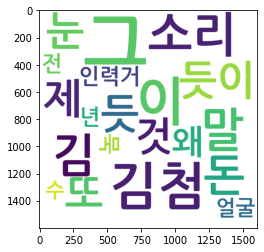

In [60]:
gen = wc.generate_from_frequencies(dict_frequent_tuple)
plt.figure()
plt.imshow(gen)

---
❓ 위의 '운수 좋은 날'의 워드 클라우드에서는 **한 글자로 된 단어**가 높은 빈도를 가지는 바람에 

밋밋한 분석 결과가 나왔습니다.

글자 길이가 1인 단어를 제거한 뒤 다시 워드 클라우드를 생성해 주세요.

[참고] 불용어 처리

[('김첨', 27), ('소리', 23), ('듯이', 17), ('인력거', 14), ('얼굴', 13), ('사람', 11), ('정거장', 11), ('자기', 10), ('오늘', 10), ('거리', 9), ('이의', 9), ('하나', 8), ('설렁탕', 7), ('마음', 7), ('손님', 6), ('얼마', 6), ('다리', 6), ('삼이', 6), ('운수', 5), ('오십', 5)]


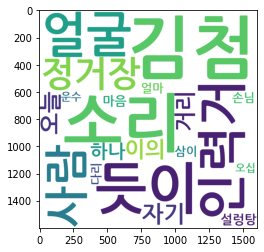

In [61]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud

from collections import Counter
from konlpy.tag import Okt

f = open('/content/sample_data/lucky_day.txt', 'r')
data = f.read()
f.close()

okt = Okt()
nouns = okt.nouns(data)

word_len_two_or_more = []

for each in nouns:   
  if len(each) > 1:   # 글자 길이가 1 보다 큰 단어만 리스트에 넣음
    word_len_two_or_more.append(each)

c = Counter(word_len_two_or_more)

c_frequent_tuple = c.most_common(20)   # 빈도 상위 20위 명사 추출
print(c_frequent_tuple)

dict_frequent_tuple = dict(c_frequent_tuple)
dict_frequent_tuple

wc = WordCloud(width=800, height=800, scale=2.0, max_font_size=250, background_color="white", 
               font_path='/content/sample_data/NanumGothicBold.ttf',
               random_state=42)

gen = wc.generate_from_frequencies(dict_frequent_tuple)
plt.figure()
plt.imshow(gen)

---
❓ 축구 기사와 골프 기사에서 사용되는 주요 단어를 워드 클라우드 가시화로 비교해 주세요.

> soccer.txt 와 golf.txt 를 sample_data 폴더에 올려 주세요.

[('리그', 32), ('승점', 20), ('경기', 17), ('라운드', 13), ('축구', 6), ('전북', 6), ('울산', 6), ('대구', 6), ('시티', 6), ('하위', 5), ('모두', 5), ('상대', 5), ('조호르', 5), ('그룹', 4), ('전남', 4), ('순위', 4), ('승자승', 4), ('경쟁', 4), ('라이언', 4), ('요코하마', 4)]


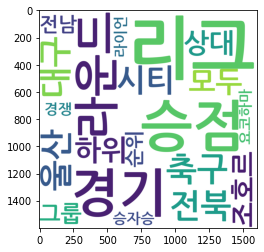

In [62]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud

from collections import Counter
from konlpy.tag import Okt

f = open('/content/sample_data/soccer.txt', 'r')
data = f.read()
f.close()

okt = Okt()
nouns = okt.nouns(data)

word_len_two_or_more = []
for each in nouns:
  if len(each) > 1:
    word_len_two_or_more.append(each)

c = Counter(word_len_two_or_more)

c_frequent_tuple = c.most_common(20)   # 빈도 상위 20위 명사 추출
print(c_frequent_tuple)

dict_frequent_tuple = dict(c_frequent_tuple)
dict_frequent_tuple

wc = WordCloud(width=800, height=800, scale=2.0, max_font_size=250, background_color="white", 
               font_path='/content/sample_data/NanumGothicBold.ttf',
               random_state=42)

gen = wc.generate_from_frequencies(dict_frequent_tuple)
plt.figure()
plt.imshow(gen)

[('대회', 20), ('우승', 14), ('투어', 13), ('챔피언십', 10), ('박현', 8), ('골프', 7), ('연패', 7), ('경은', 6), ('시즌', 6), ('작년', 6), ('유해', 6), ('프로', 5), ('차례', 5), ('김효주', 5), ('코스', 5), ('한국', 4), ('여자', 4), ('상금', 4), ('출전', 4), ('올해', 4)]


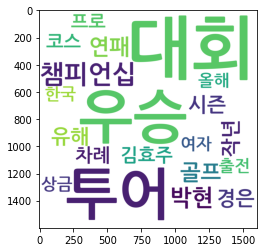

In [63]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud

from collections import Counter
from konlpy.tag import Okt

f = open('/content/sample_data/golf.txt', 'r')
data = f.read()
f.close()

okt = Okt()
nouns = okt.nouns(data)

word_len_two_or_more = []
for each in nouns:
  if len(each) > 1:
    word_len_two_or_more.append(each)

c = Counter(word_len_two_or_more)

c_frequent_tuple = c.most_common(20)   # 빈도 상위 20위 명사 추출
print(c_frequent_tuple)

dict_frequent_tuple = dict(c_frequent_tuple)
dict_frequent_tuple

wc = WordCloud(width=800, height=800, scale=2.0, max_font_size=250, background_color="white", 
               font_path='/content/sample_data/NanumGothicBold.ttf',
               random_state=42)

gen = wc.generate_from_frequencies(dict_frequent_tuple)
plt.figure()
plt.imshow(gen)

---
❓ 찰즈 디킨스의 '위대한 유산'을 워드 클라우드로 가시화 해보세요.

> great_expectations.txt 를 sample_data 폴더에 올려 주세요.

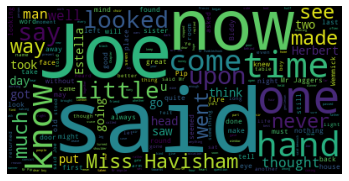

In [64]:
# https://python-course.eu/applications-python/python-wordcloud-tutorial.php

# importing the necessary modules:

import numpy as np
import pandas as pd
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

import matplotlib.pyplot as plt
# from PIL import Image
text = open("/content/sample_data/great_expectations.txt").read()

wordcloud = WordCloud(background_color="black").generate(text)

# Display the generated image:
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

---
---
#### **2022 Summer Coding 5 예고**

다음에는 한글 자음-모음 분리를 이용해 한국어의 라임을 찾는 방법과 

통계적인 텍스트 자동 분류 기법인 나이브 베이즈 분류에 대해 배우겠습니다.